# Homework 1

To date, more than 3000 nuclei have been found in experiment. While some of them are stable, most of them decay in a certain mode. 

<!--img src='NNDC_NuDat_DecayMode.png' width='700'-->
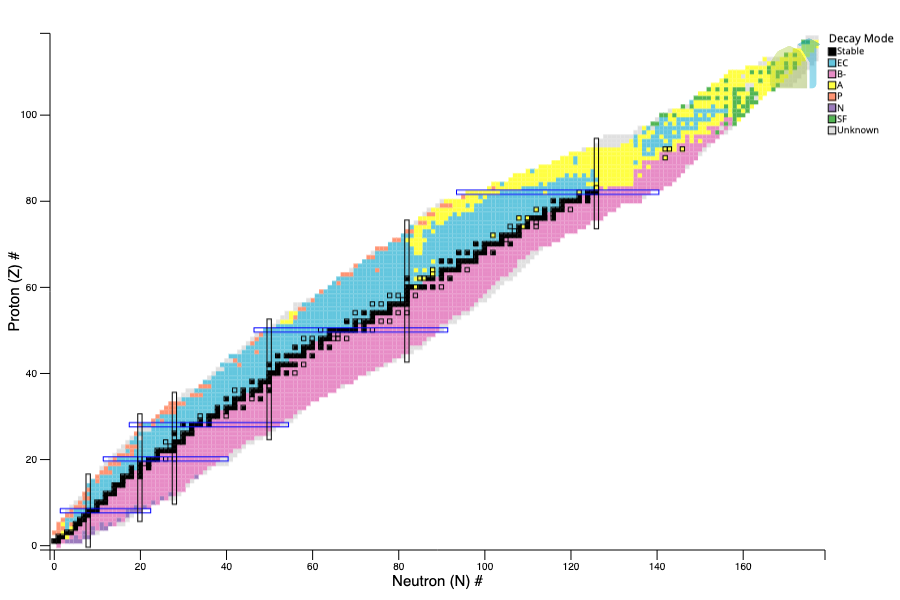

Many properties of those nuclei have been measured, including their **binding energy** which is the energy needed to dissociate a nucleus into free nucleons. 

A simple, but quite successful, model for nuclear binding energies is the **liquid drop model** (LDM). In liquid drop model, the binding energy (in $\text{MeV}$) of a nucleus with $Z$ protons and $N$ neutrons can be written as: ($A = Z + N$)

$$
BE(Z,N) = a_V A - a_S A^\frac{2}{3} - a_C \frac{Z^2}{A^\frac{1}{3}} - a_A \frac{(N-Z)^2}{A} + a_P \frac{1}{A^\frac{3}{4}}
$$

where (in unit of $\text{MeV}$)
- $a_V = 15.76$ is called the **volume** term
- $a_S = 17.81$ is called the **surface** term
- $a_C = 0.711$ is called the **Coulomb** term
- $a_A = 23.702$ is called the **asymmetry** term
- $a_P = \left\{ \begin{array}{rl} 
         +34 & \text{if} \ \ (Z,N) = (\text{even},\text{even}) \\ 
         0 & \text{if} \ \ (Z,N) = (\text{even}/\text{odd}, \text{odd}/\text{even}) \\ 
         -34 & \text{if} \ \ (Z,N) = (\text{odd},\text{odd})
         \end{array} \right.$ is called the **pairing** term
         
<!--img src='Wiki_LiquidDropModel.png' width='700'-->
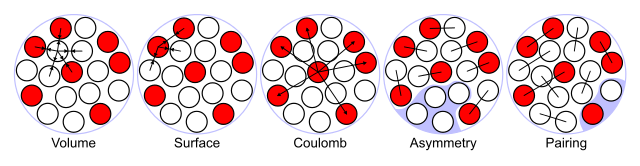

One usage of binding energy is to compute the mass $m$ of a nucleus:

$$
m(Z,N) = Z \times m(\text{hydrogen atom}) + N \times m(\text{free neutron}) - BE(Z,N)
$$

Thus, this formula is also known as the **semi-empirical mass formula** or the **Weizsaecker formula**.
         
The file `NNDC_NuDat_BindingEnergy.csv` contains the **binding energy per nucleon**, in $\text{keV}$, of the known nuclei. Let us have some fun with this dataset in this homework!

**References**
- [National Nuclear Data Center](https://www.nndc.bnl.gov/), Brookhaven National Laboratory, United States
- [Semi-empirical mass formula](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula), Wikipedia

In [1]:
# Import packages here
# ==========================================================================================
# import the packages
# ==========================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm # color map package
from matplotlib.colors import ListedColormap # color package
# --------------------
# setting of plot
# --------------------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 600
from IPython.display import Markdown
# ==========================================================================================
# import the data
# ==========================================================================================
table = pd.read_csv('NNDC_NuDat_BindingEnergy.csv', sep=',')
datas = table.to_numpy()
(N, Z, BE) = (datas[:,0].astype(int), datas[:,1].astype(int), datas[:,2].astype(np.float64))
# ==========================================================================================
# (lamda function) printing the answer more cool ~ 
# ==========================================================================================
answer = lambda str: Markdown('''
<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>'''+'''\n\n%s</div>
'''%str)

### Problem 1.1 (1 point)

Which element ($Z$) has most isotopes (different $N$ s)? How many isotopes does this element have? 

In [2]:
# Write your code here
Z_freq = np.bincount(Z)     # 頻率：計算每個 Z 都重複了幾次（最多 Z 的就是最多 N 不同的）
Z_list = np.unique(Z)       # 序列：把重複的 Z 去掉，每個元素對應到其平率
i_max = np.argmax(Z_freq)   # 索引： Z 重複最多次的位置

Z_max = Z_list[i_max]       # Z：最多同位數的元素，原子序是多少
N_max = Z_freq[i_max]       # N：最多同位數的元素，同位素的數量、中子數

# print answer
answer('''Element $Z=%i$ has the most isotopes,<br>where the number of isotopes $N$ is $%i$.'''%(Z_max,N_max))


<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>

Element $Z=80$ has the most isotopes,<br>where the number of isotopes $N$ is $47$.</div>


### Problem 1.2 (1 point)

Which nucleus ($Z$ and $N$) has the largest binding energy per nucleon? What is the value of this maximum binding energy per nucleon?

In [3]:
# Write your code here
E_max = np.max(BE)      # BE：找到最大 Binding Energy
i_max = np.argmax(BE)   # 索引：找到最大 Binding Energy 的索引

Z_max = Z[i_max]        # Z：最大 Binding Energy 的原子序
N_max = N[i_max]        # N：最大 Binding Energy 的中子數

# print answer
answer('Nucleus $Z=%i$ and $N=%i$ has the largest binding energy,<br>where the binding energy $E$ is $%f$.'%(Z_max,N_max,E_max))


<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>

Nucleus $Z=28$ and $N=34$ has the largest binding energy,<br>where the binding energy $E$ is $8794.555500$.</div>


### Problem 1.3 (1 point)

Isobars are nuclei that have the same number of nucleons $A$. How many isobars are there for $A = 150$?

In [4]:
# Write your code here
A = N+Z                     # 計算核內粒子數量 A 
N_Ais150 = (A==150).sum()   # 數量 A 為 150 的全部加起來

# print answer
answer('There are $%i$ isobars, where $A=150$.'%(N_Ais150))


<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>

There are $18$ isobars, where $A=150$.</div>


### Problem 1.4 (2 points)

Write a function that takes $Z$ and $N$, and returns the experimental value of binding energy per nucleon. 

In [5]:
# Write your code here
def BE_exp(z,n):
    '''
    Here Z, N, BE must have been defined.
    input: z,n
    '''
    i_Z = np.where(Z==z)    # 數列：找到 Z 為 z 的所有索引
    i_N = np.where(N==n)    # 數列：找到 N 為 n 的所有索引
    
    i_all = np.hstack((i_Z,i_N))[0]                         # 將以上兩數列合併
    (i_list, counts) = np.unique(i_all, return_counts=True) # 將合併的數列變為不重複的數列，重複的位置就是要找 BE 的索引
    i_counts_max = np.argmax(counts)                        # 找到重複索引的位置
    i = i_list[i_counts_max]                                # 紀錄 Z=z, N=n 的索引
    return BE[i]    # 回傳 Z=z, N=n 的 Binding Energy

# print axample 
answer('Example: The Experimental value of biding energy for $Z = 4$ and $N = 2$ is $BE=%f$'%(BE_exp(4,2)))



<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>

Example: The Experimental value of biding energy for $Z = 4$ and $N = 2$ is $BE=4487.247800$</div>


### Problem 1.5 (2 points)

Write a function that takes $Z$ and $N$, and returns the theoretical value of binding energy per nucleon predicted by the liquid drop model.

In [6]:
# Write your code here
def BE_the(Z,N):
    A = Z+N
    aV = 15.76
    aS = 17.81
    aC = 0.71
    aA = 23.702
    aP = 34 * (1 - Z%2 - N%2)
    #E = aV * A - aS * A**(2/3) - aC * Z*(Z-1)/A**(1/3) - aA * (N-Z)**2/A + aP/A**(3/4)     # Formula in Wiki
    E = aV * A - aS * A**(2/3) - aC * Z**2/A**(1/3) - aA * (N-Z)**2/A + aP/A**(3/4)         # Formula in this project
    return E*1000/A # MeV to keV


# print some examples
answer(r'''
You can check the function <a href='https://www.desmos.com/calculator/b9wyk2hlyz'>here</a>
- $E\left(10,10\right) = {}$
- $E\left(11,10\right) = {}$
- $E\left(10,11\right) = {}$
- $E\left(11,11\right) = {}$
'''.format(BE_the(10,10),BE_the(11,10),BE_the(10,11),BE_the(11,11)))


<style>*{box-sizing:border-box;position:relative}.answer{width:auto;background-color:#fff;color:#000;display:block;padding:12px 30px 0 30px;text-decoration:none;border-radius:10px;border:1px #333 solid;overflow:hidden;box-shadow:0 0 3px #333 inset;color:black;transition:.3s;transform:perspective(1px) translateZ(0)}.answer a{color:red}.answer:hover{text-shadow:0 0 10px #fff;color:white;box-shadow:0 0 10px #333}.answer:hover a{color:yellow}.answer:before{content:'';display:block;position:absolute;width:100%;height:100%;top:0;left:0;clip-path:circle(0 at 50% 50%);background:#333;transition:.3s;opacity:1;box-shadow:1px 1px 10px #000 inset;z-index:-1}.answer:hover:before{clip-path:circle(100% at 50% 50%)}</style>
<div class='answer'>


You can check the function <a href='https://www.desmos.com/calculator/b9wyk2hlyz'>here</a>
- $E\left(10,10\right) = 8070.66183368903$
- $E\left(11,10\right) = 7768.032045214442$
- $E\left(10,11\right) = 8025.378733491794$
- $E\left(11,11\right) = 7858.148690392895$
</div>


### Problem 1.6 (1 point)

Make a histogram of binding energy per nucleon. Set the range to $\left[0 \ \text{keV}, 1000 \ \text{keV}\right]$ and use 30 bins.

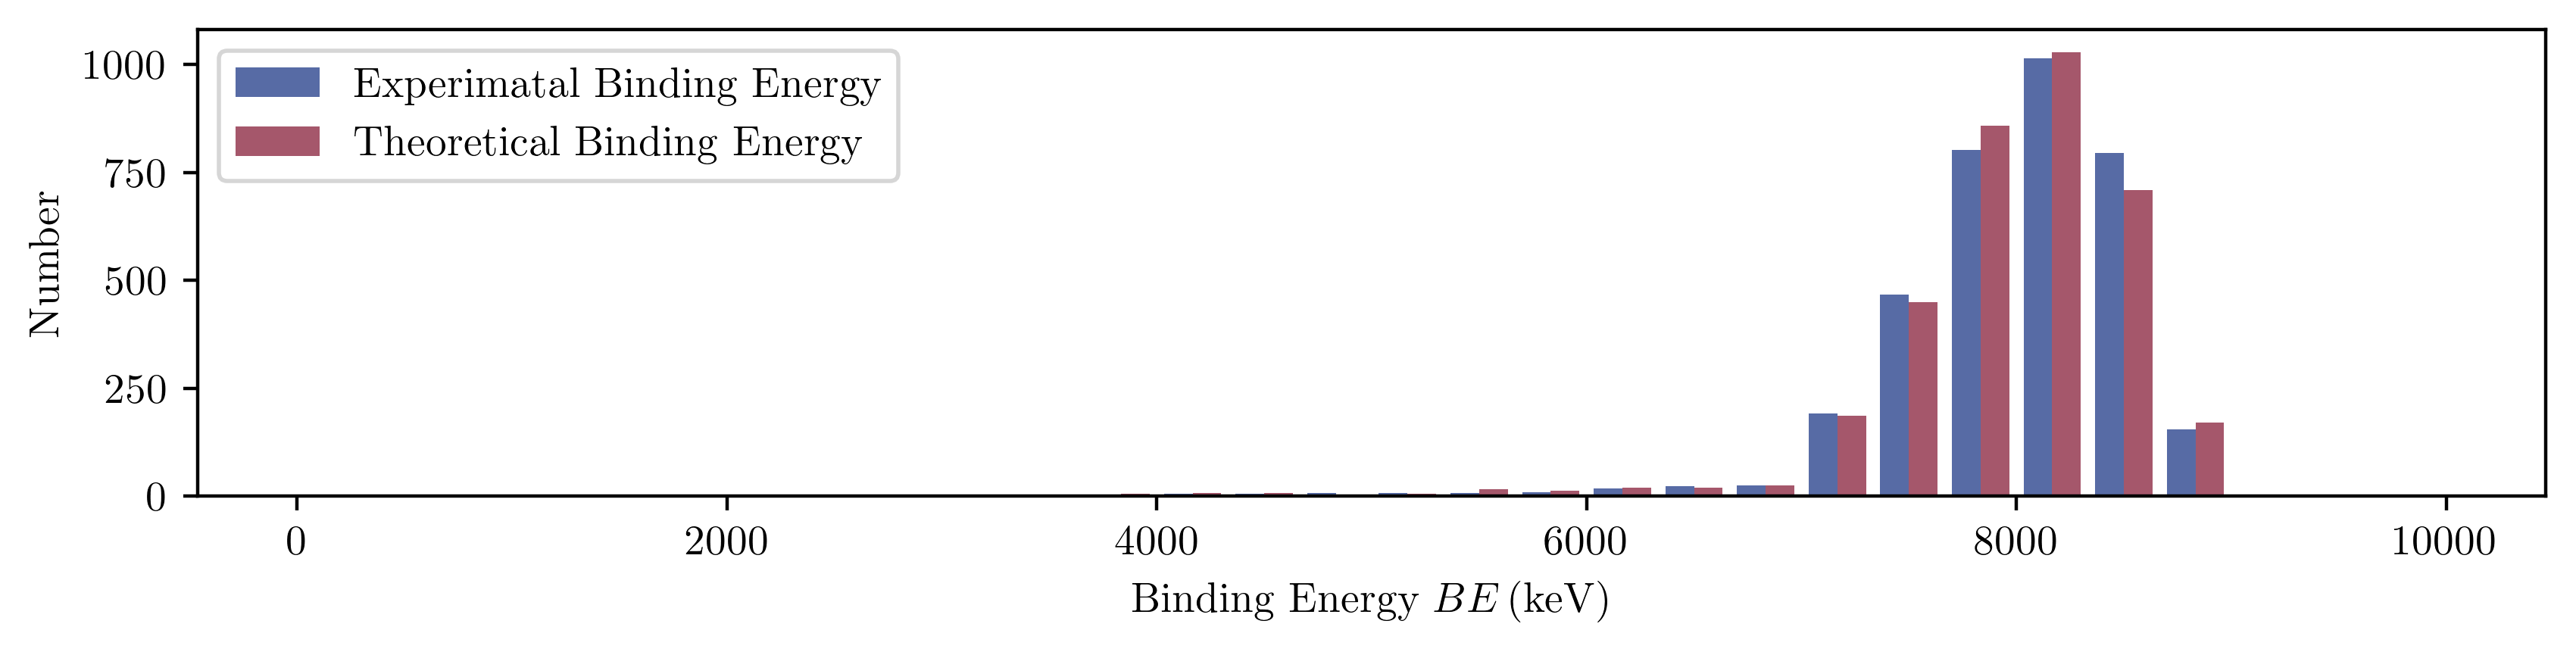

In [7]:
# Write your code here
Erange = (0,10000)
plt.figure(dpi=400,figsize=(10,2))
plt.hist([BE,BE_the(Z,N)],bins=30,range=Erange,color=['#576ba5','#a5576b'],
        label=['Experimatal Binding Energy','Theoretical Binding Energy'])


plt.xlabel(r'Binding Energy $BE\left(\rm keV\right)$')
plt.ylabel(r'Number')
plt.legend()
plt.show()

### Problem 1.7 (2 points)

Plot binding energy per nucleon versus $A$ for the isotopes of oxygen ($Z = 8$).

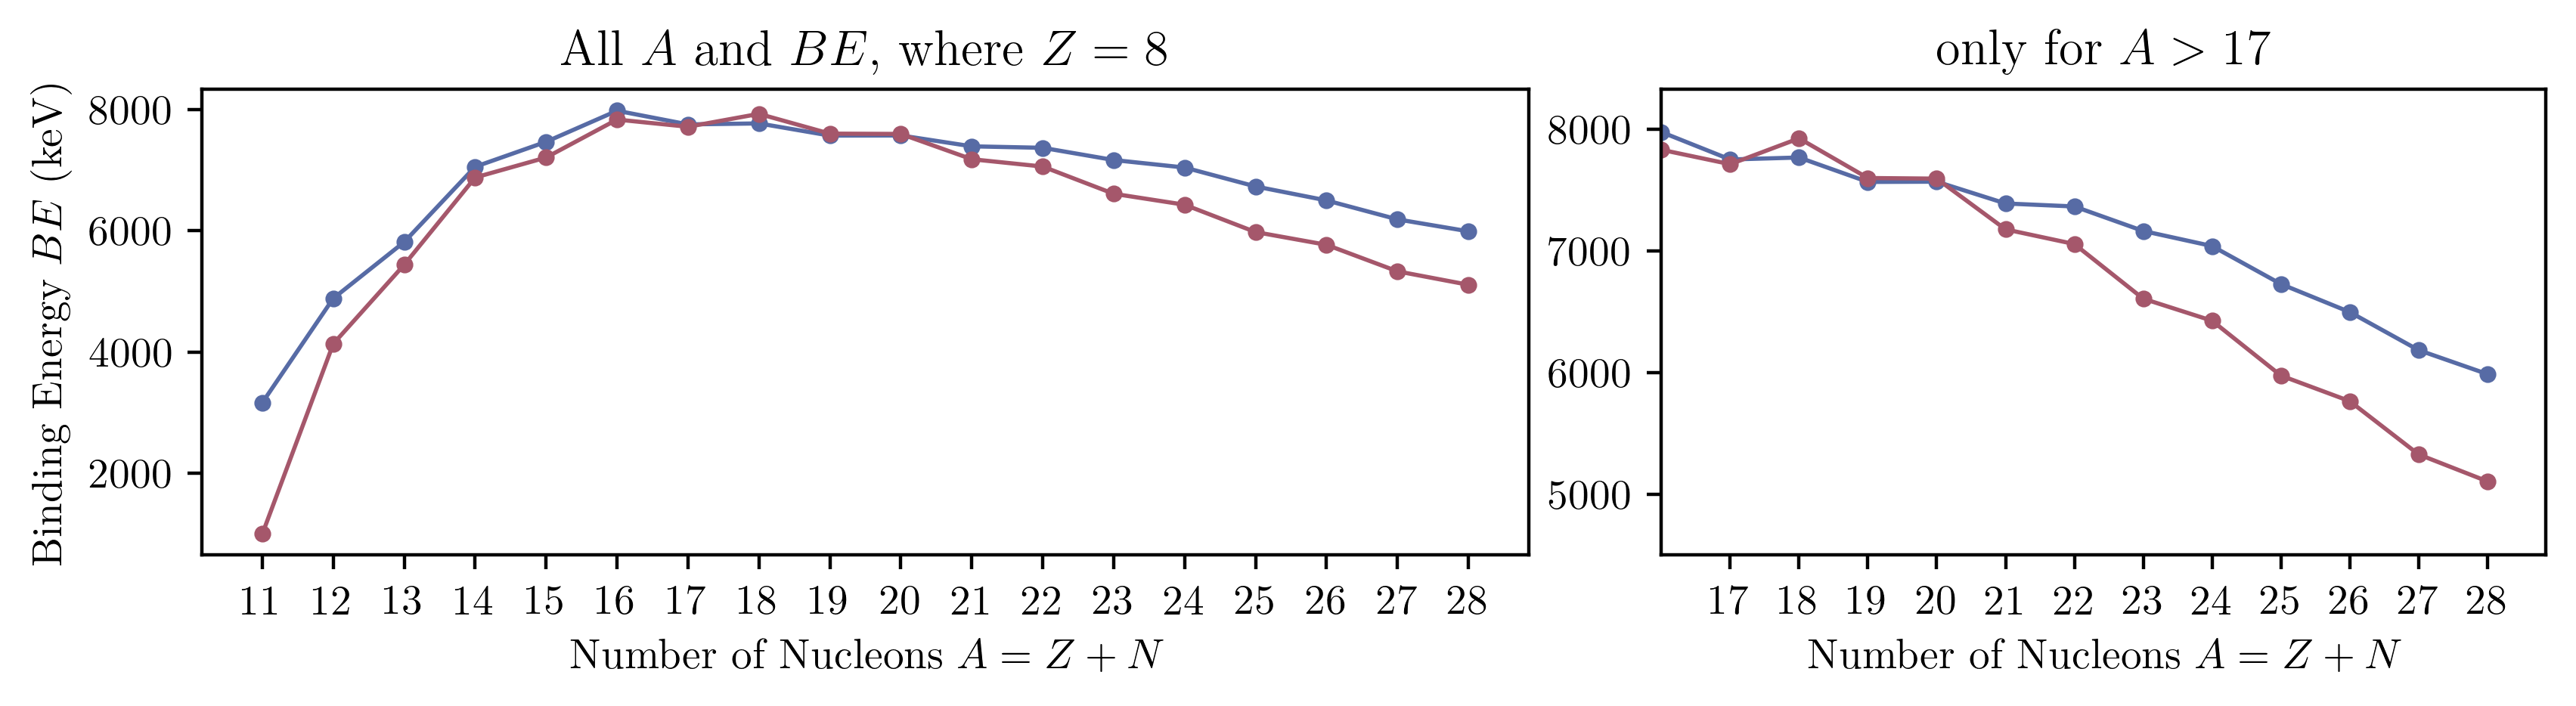

In [8]:
i = np.where(Z==8)

fig = plt.figure(dpi=400, figsize=(10,2))
(a0, a1) = fig.subplots(1, 2, gridspec_kw={'width_ratios': [3, 2]})
a0.plot(A[i], BE[i],'.-',color='#576ba5',linewidth=1,label='Experimatal Binding Energy')
a0.plot(A[i], BE_the(Z[i],N[i]),'.-',color='#a5576b',linewidth=1,label='Theoretical Binding Energy')
a0.get_xaxis().set_ticks(range(11,29))
a0.set_title('All $A$ and $BE$, where $Z=8$')

a1.plot(A[i], BE[i],'.-',color='#576ba5',linewidth=1,label='Experimatal Binding Energy')
a1.plot(A[i], BE_the(Z[i],N[i]),'.-',color='#a5576b',linewidth=1,label='Theoretical Binding Energy')
a1.set_xlim(16,)
a1.set_ylim(4500,)
a1.get_xaxis().set_ticks(range(17,29))
a1.set_title('only for $A>17$')

a0.set_ylabel(r'Binding Energy $BE$ ($\rm keV$)')
a0.set_xlabel(r'Number of Nucleons $A = Z + N$')
a1.set_xlabel(r'Number of Nucleons $A = Z + N$')
fig.subplots_adjust(wspace=0.12, hspace=0)
#fig.tight_layout()
plt.show()

### Problem 1.8 (3 points)

Make a scatter plot similar to the one displayed in the beginning, but color it according to the experimental values of binding energy per nucleon. That is, plot $BE/A$ versus ($Z$, $N$). Remember to show the color bar.

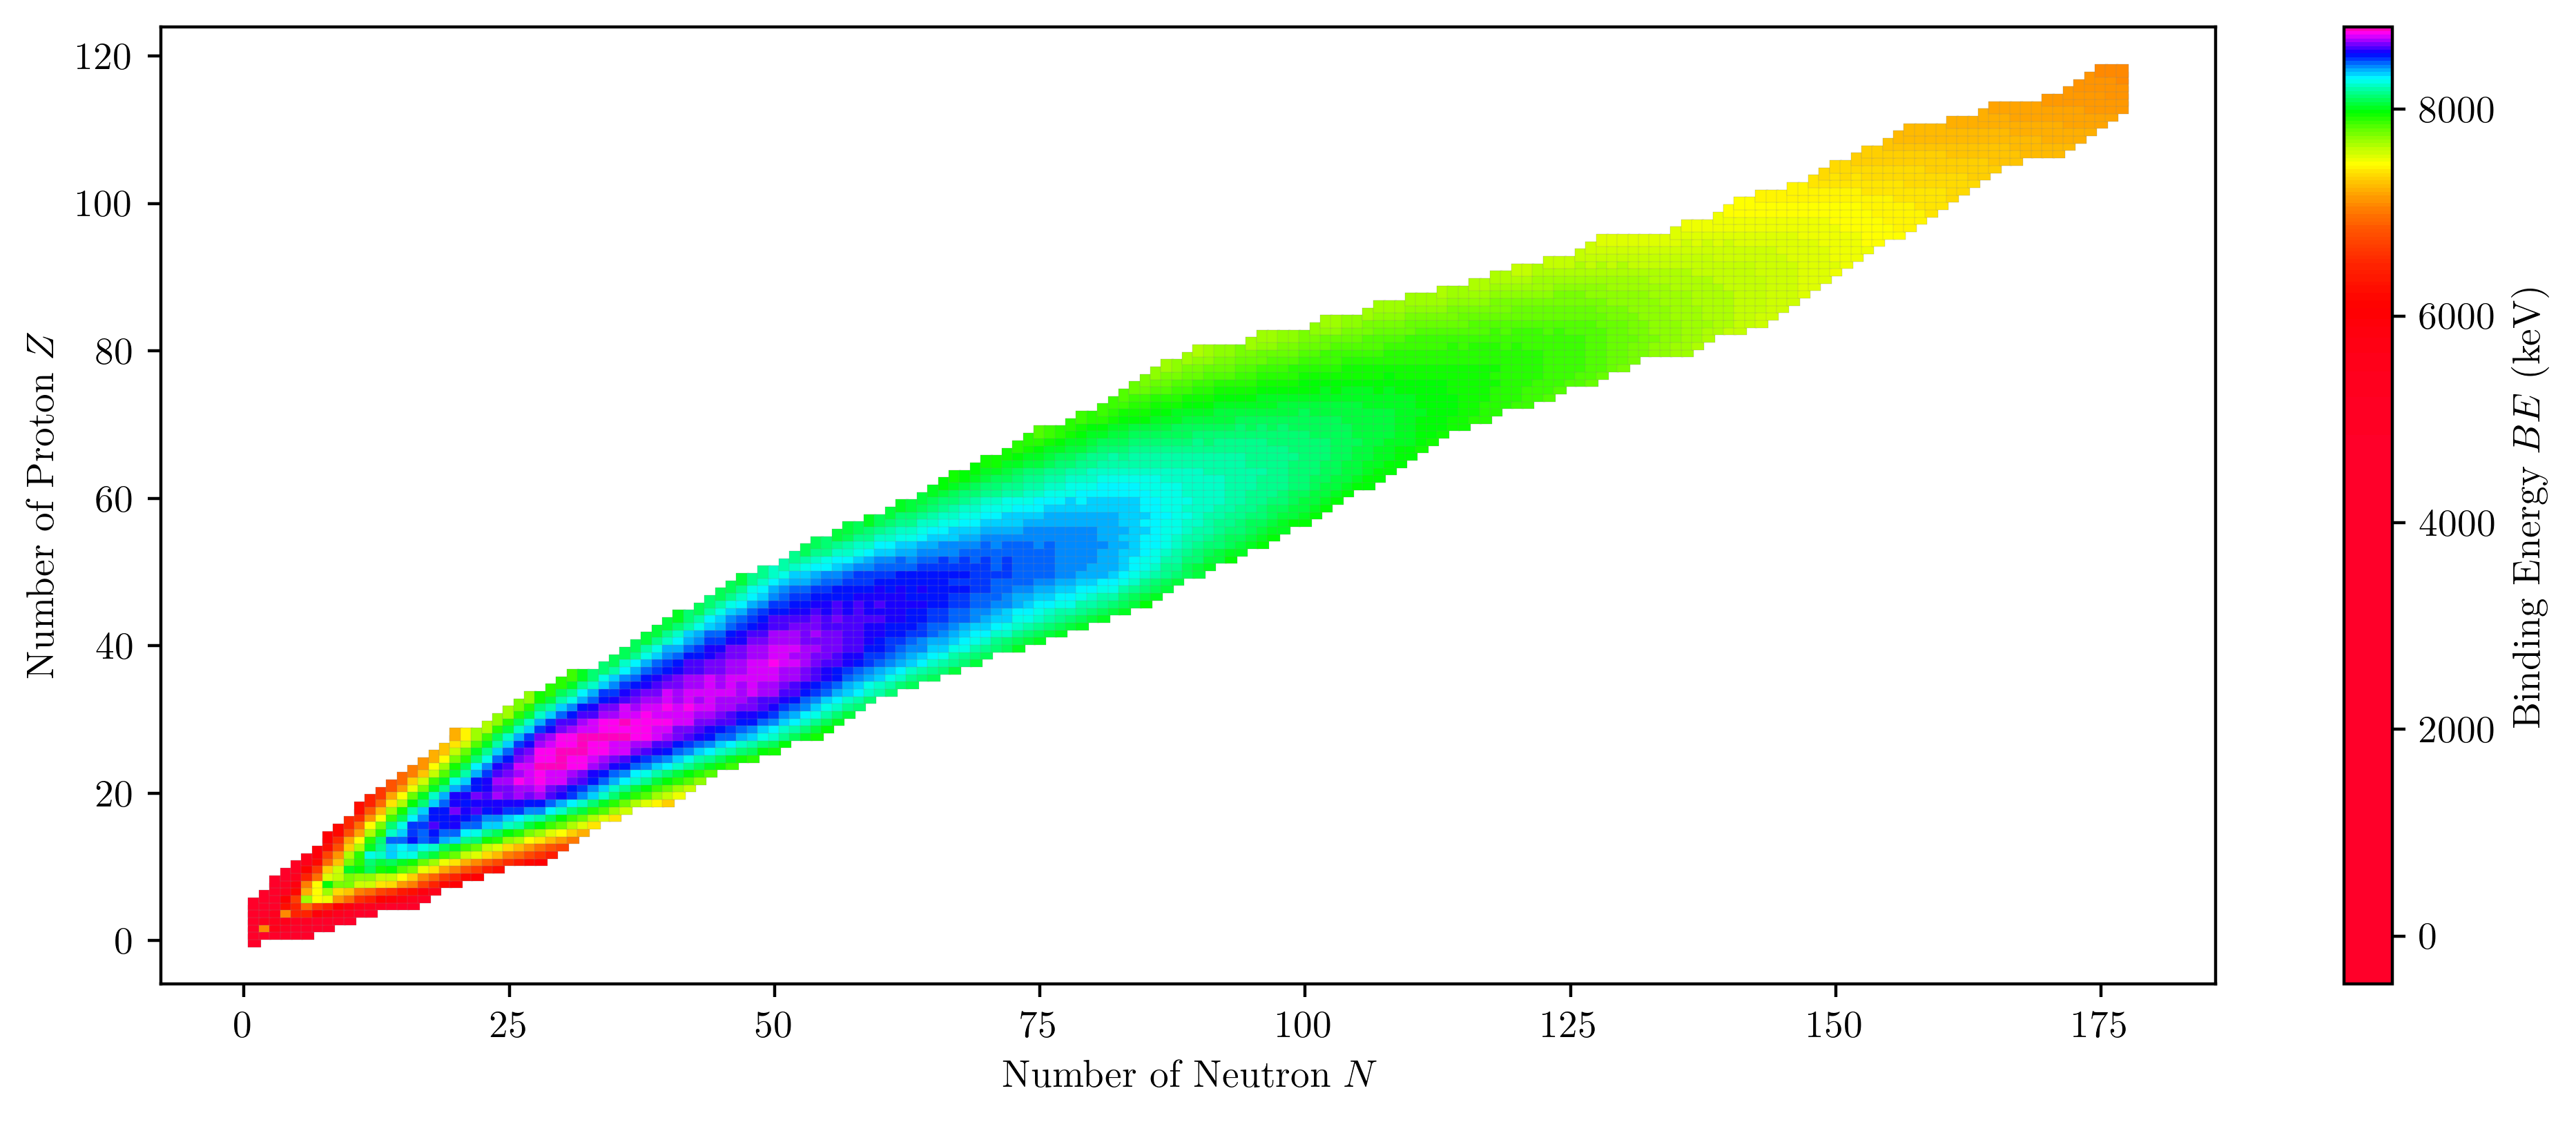

In [9]:
# Write your code here
plt.figure(dpi=400,figsize=(12, 4.5))
colormap = plt.cm.get_cmap('gist_rainbow')
colormap = cm.get_cmap('gist_rainbow', 256)
x = np.linspace(0, 1, 256)
newcolors = colormap(x**10)
newcmp = ListedColormap(newcolors)

plt.scatter(N, Z, c=BE, cmap=newcmp, marker='s',vmin=min(BE), vmax=max(BE) , s=11, edgecolors='#888', linewidths=0.05)
plt.colorbar(label=r'Binding Energy $BE$ ($\rm keV$)')
plt.xlabel('Number of Neutron $N$')
plt.ylabel('Number of Proton $Z$')
plt.show()

### Problem 1.9 (3 points)

Make a scatter plot similar to the one displayed in the beginning, but color it according to the differences between experimental and theoretical values of binding energy per nucleon. That is, plot $BE/A - BE/A(\text{LDM})$ versus ($Z$, $N$). Remember to show the color bar.

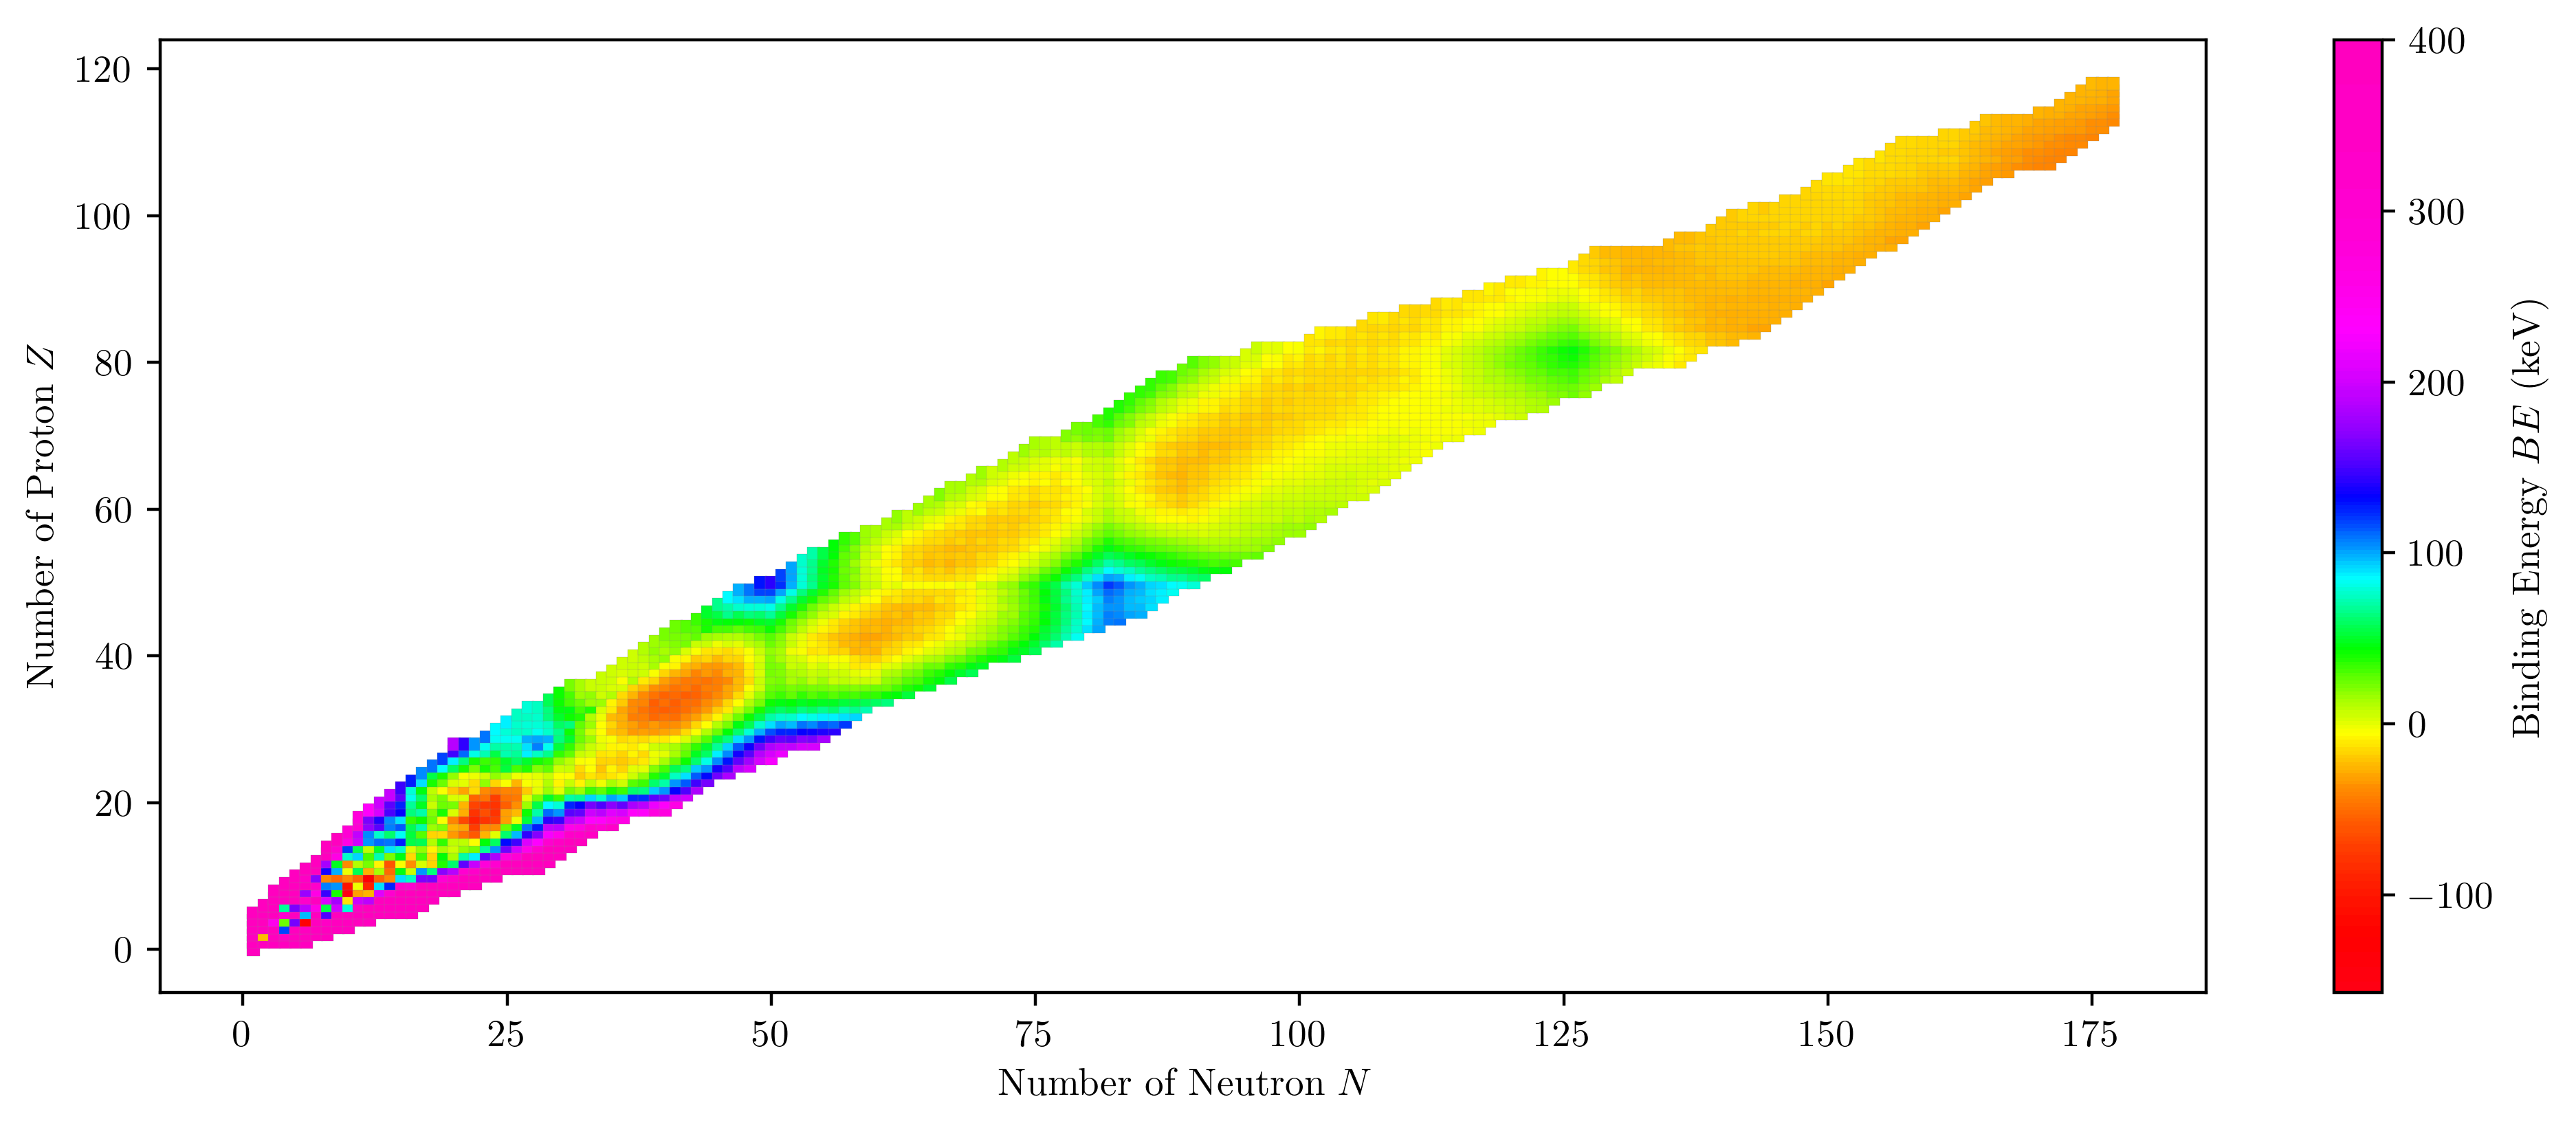

In [10]:
# Write your code here
plt.figure(dpi=400,figsize=(12, 4.5))
colormap = plt.cm.get_cmap('gist_rainbow')
colormap = cm.get_cmap('gist_rainbow', 256)
x = np.linspace(0, 1, 256)
y = (np.tanh(5*(x-0.4))+1)/2
newcolors = colormap(y)
newcmp = ListedColormap(newcolors)
diff = BE - BE_the(Z,N)

plt.scatter(N, Z, c=diff, marker='s', vmax=400,cmap=newcmp, s=11, edgecolors='#888', linewidths=0.05)
plt.colorbar(label=r'Binding Energy $BE$ ($\rm keV$)')
plt.xlabel('Number of Neutron $N$')
plt.ylabel('Number of Proton $Z$')
plt.show()